In [2]:
import string
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from statsmodels.graphics.mosaicplot import mosaic
from collections import Counter

In [4]:
colnames = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df = pd.read_csv("adult.data",names = colnames, header=None)
print(len(df.index))
df = df[df["workclass"] != '?']
df = df[df["workclass"] != ' ?']
df = df[df["education"] != '?']
df = df[df["marital_status"] != '?']
df = df[df["occupation"] != '?']
df = df[df["occupation"] != ' ?']
df = df[df["relationship"] != '?']
df = df[df["race"] != '?']
df = df[df["sex"] != '?']
df = df[df["native_country"] != '?']
df = df[df["native_country"] != ' ?']
print(len(df.index))
for col in df.columns:
  print(df[col].unique())

32561
30162
[39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
[ 77516  83311 215646 ...  84661 257302 201490]
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
['

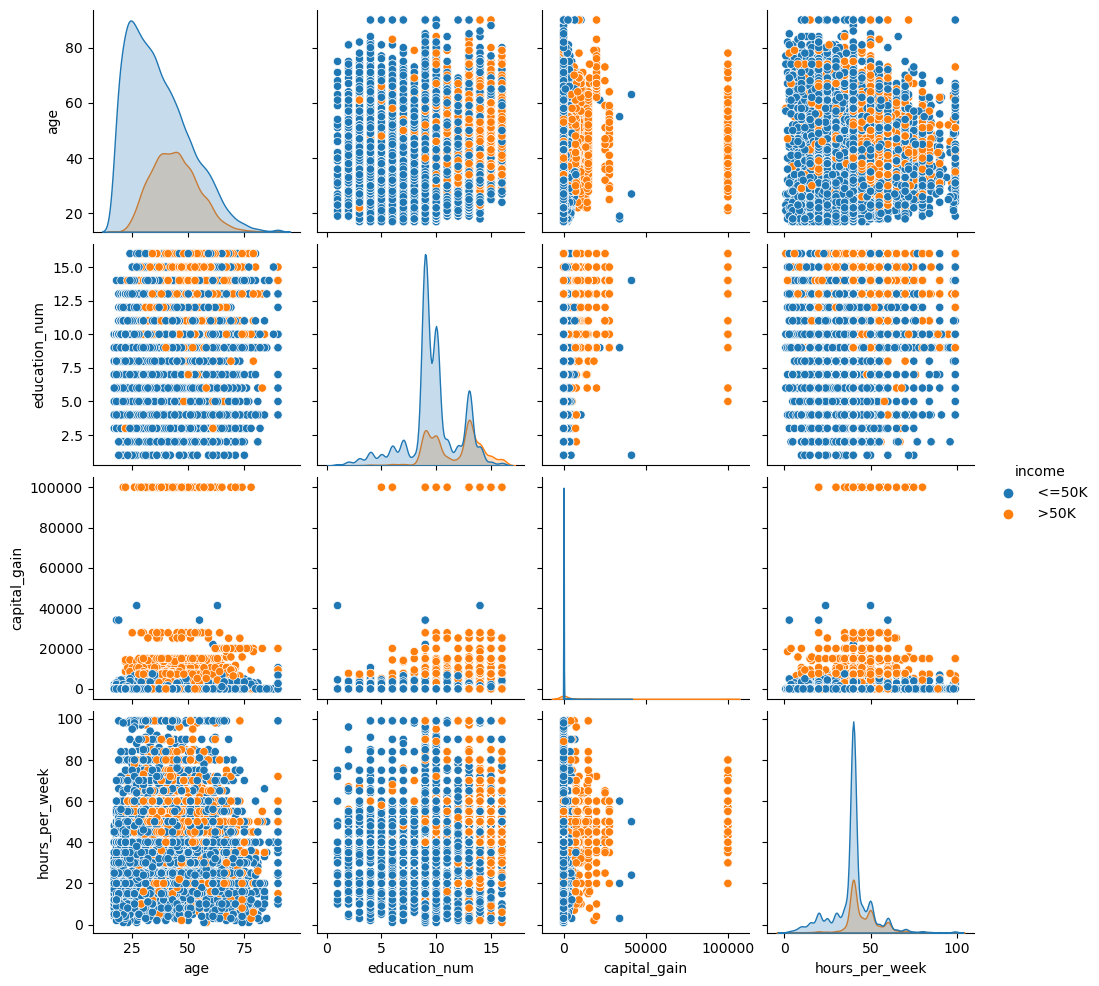

In [3]:
df1 = df[['age','education_num','capital_gain','hours_per_week','income']].copy(deep=True)
sns.pairplot(data=df1, hue='income')

In [4]:
## FIRST STORY - 3 VISUALISATIONS :-

Text(0.5, 1.0, 'Heatmap')

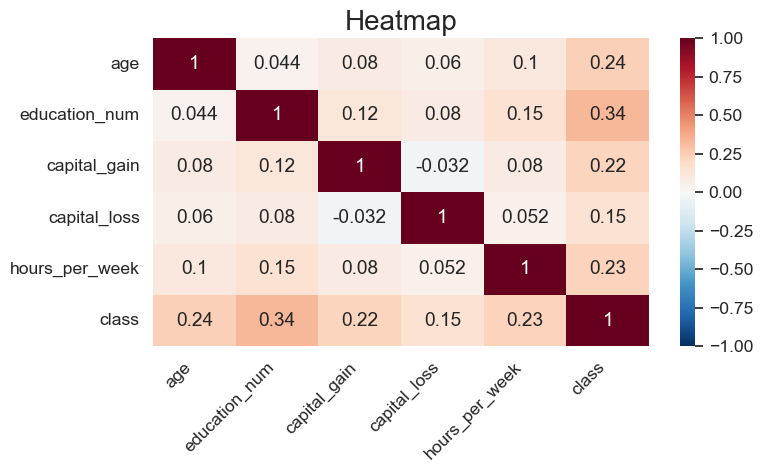

In [62]:
df1 = df[['age','education_num','capital_gain','capital_loss','hours_per_week','class']].copy()
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    df1.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);
plt.xticks(rotation=45, ha='right')
plt.title("Heatmap", fontsize=20)

Text(0.5, 1.0, 'Heatmap')

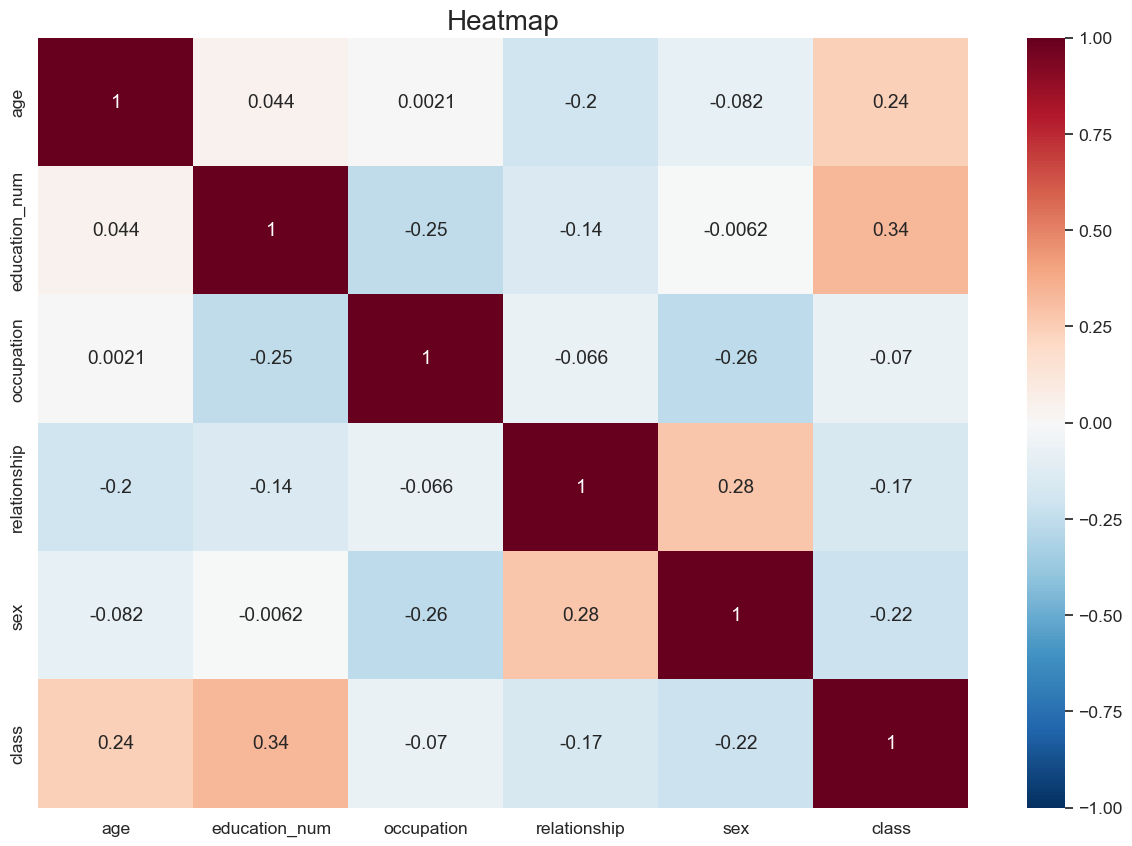

In [59]:
df['class'] = (df["income"].str.contains(">50K"))*1
df1 = df[['age','education_num','occupation', 'relationship', 'sex', 'class']].copy()
df1['occupation'].replace([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
 ' Other-service', ' Sales', ' Transport-moving', ' Farming-fishing',
 ' Machine-op-inspct', ' Tech-support', ' Craft-repair', ' Protective-serv',
 ' Armed-Forces', ' Priv-house-serv'],[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace=True)
df1['relationship'].replace([' Not-in-family',' Husband', ' Wife', ' Own-child', ' Unmarried', ' Other-relative'],[0, 1, 2, 3, 4, 5], inplace=True)
df1['sex'].replace([' Male',' Female'],[0, 1], inplace=True)

sns.set(font_scale=1.15)
plt.figure(figsize=(15,10))
sns.heatmap(
    df1.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);
plt.title("Heatmap", fontsize=20)

In [6]:
below_50K = df.loc[df["income"].str.contains("<=50K")]
above_50K = df.loc[df["income"].str.contains(">50K")]
print(len(below_50K.index))
print(len(above_50K.index))

22654
7508


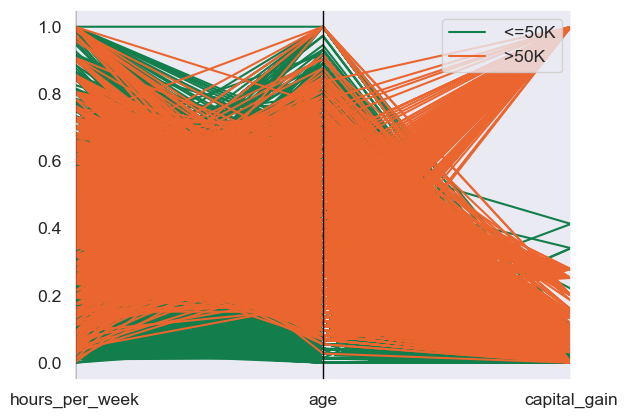

In [14]:
df['class'] = (df["income"].str.contains(">50K"))*1
plt.close()
frame_pc = df[['hours_per_week', 'age','capital_gain', 'class']].copy()
frame_np_array = MinMaxScaler().fit_transform(frame_pc.values)
frame_pc = pd.DataFrame(frame_np_array)
df.index = frame_pc.index
frame_pc['income'] = df['income']
frame_pc.columns = ['hours_per_week', 'age', 'capital_gain','class', 'income']
frame_pc_below_50K = frame_pc[frame_pc["class"] == 0]
frame_pc_above_50K = frame_pc[frame_pc["class"] == 1]
frame_pc = pd.concat([frame_pc_below_50K, frame_pc_above_50K])
pd.plotting.parallel_coordinates(frame_pc, 'income', cols=['hours_per_week', 'age', 'capital_gain'], color=('#117E4C',
                         '#EB652F'))
plt.show()

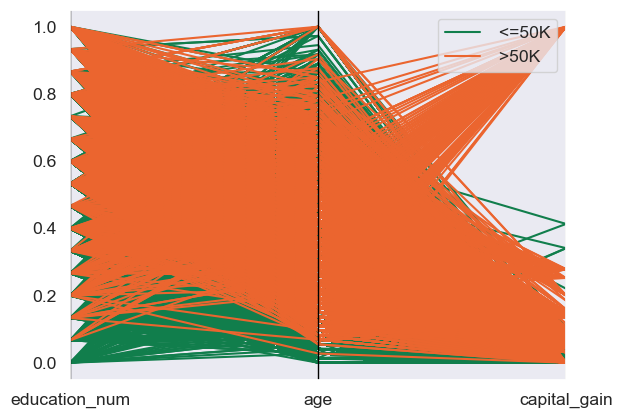

In [9]:
df['class'] = (df["income"].str.contains(">50K"))*1
plt.close()
frame_pc = df[['education_num', 'age', 'capital_gain', 'class']].copy()
frame_np_array = MinMaxScaler().fit_transform(frame_pc.values)
frame_pc = pd.DataFrame(frame_np_array)
df.index = frame_pc.index
frame_pc['income'] = df['income']
frame_pc.columns = ['education_num', 'age', 'capital_gain','class', 'income']
frame_pc_below_50K = frame_pc[frame_pc["class"] == 0]
frame_pc_above_50K = frame_pc[frame_pc["class"] == 1]
frame_pc = pd.concat([frame_pc_below_50K, frame_pc_above_50K])
pd.plotting.parallel_coordinates(frame_pc, 'income', cols=['education_num', 'age', 'capital_gain'], color=('#117E4C',
                         '#EB652F'))
plt.show()

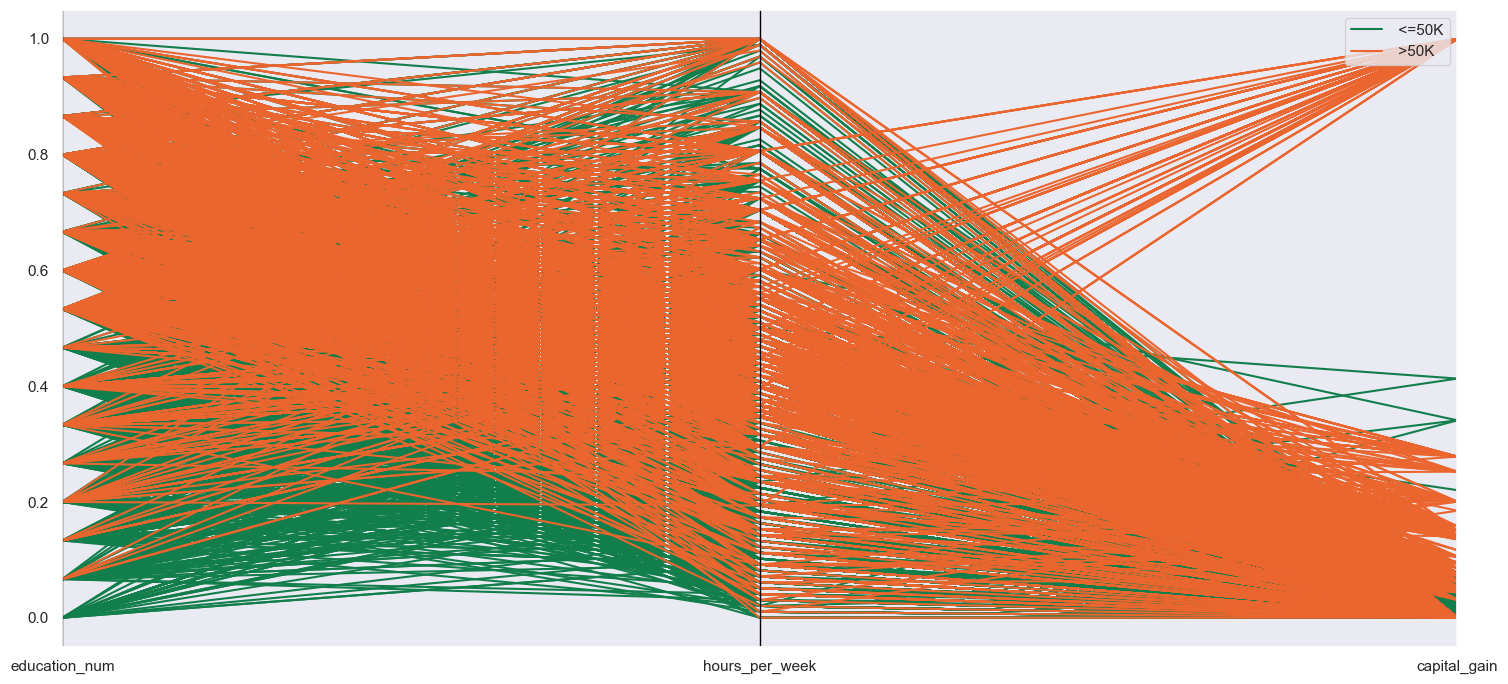

In [15]:
df['class'] = (df["income"].str.contains(">50K"))*1
plt.close()
frame_pc = df[['education_num', 'hours_per_week', 'capital_gain', 'class']].copy()
frame_np_array = MinMaxScaler().fit_transform(frame_pc.values)
frame_pc = pd.DataFrame(frame_np_array)
df.index = frame_pc.index
frame_pc['income'] = df['income']
frame_pc.columns = ['education_num', 'hours_per_week', 'capital_gain','class', 'income']
frame_pc_below_50K = frame_pc[frame_pc["class"] == 0]
frame_pc_above_50K = frame_pc[frame_pc["class"] == 1]
frame_pc = pd.concat([frame_pc_below_50K, frame_pc_above_50K])
pd.plotting.parallel_coordinates(frame_pc, 'income', cols=['education_num', 'hours_per_week', 'capital_gain'], color=('#117E4C',
                         '#EB652F'))
plt.show()

(<AxesSubplot:title={'center':'Box plot showing age, hours per week vs. Salary range'}, xlabel='age', ylabel='hours_per_week'>,
 <matplotlib.legend.Legend at 0x7f7dc95ca880>)

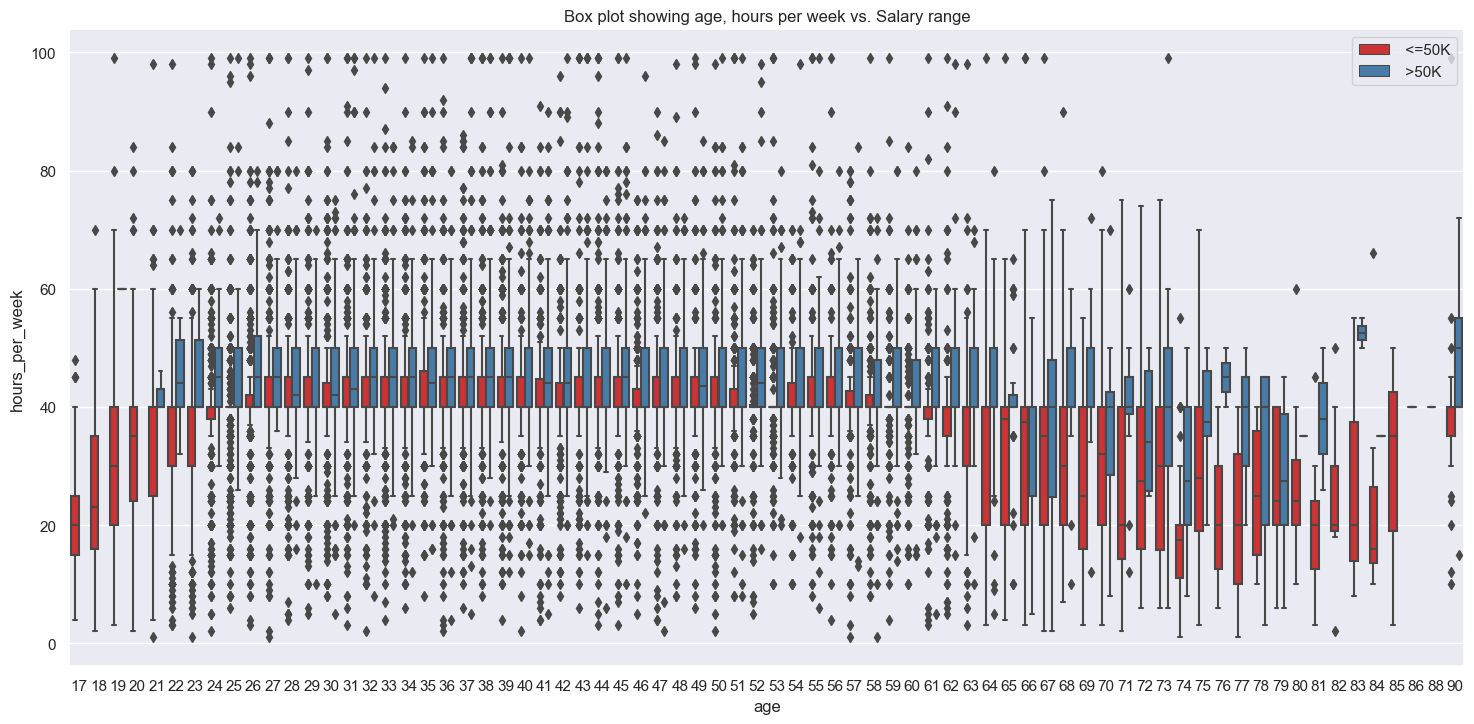

In [16]:
sns.set(rc={'figure.figsize':(18,8.27)})
g = sns.boxplot(
    x='age', 
    y='hours_per_week', 
    data=df,
    palette='Set1',
    hue='income',
    );
g, plt.title("Box plot showing age, hours per week vs. Salary range")
g, plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

Text(0.5, 0, 'capital_gain')

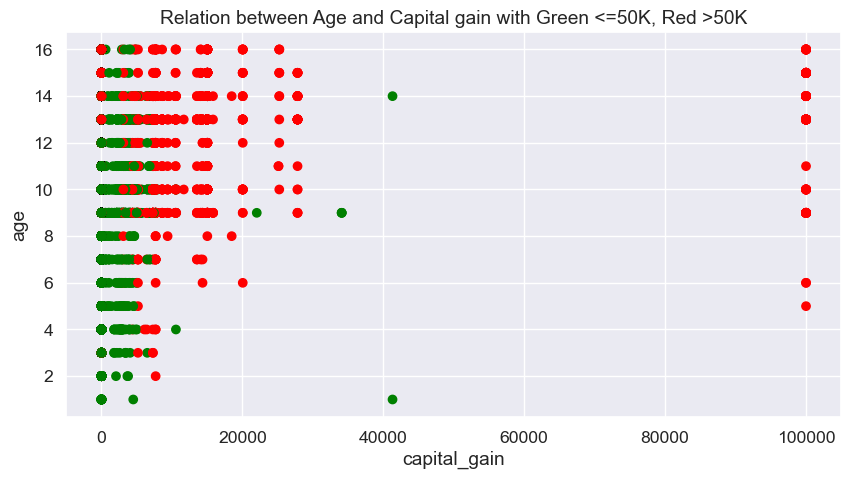

In [13]:
plt.close()
df['class'] = (df["income"].str.contains(">50K"))*1
colors = df['class']
col = ['green','red']
x = df['capital_gain']
y = df['age']
fig = plt.figure(figsize=(10,5))
plt.scatter(x,y, c=df['class'], cmap=matplotlib.colors.ListedColormap(col))
plt.title("Relation between Age and Capital gain with Green <=50K, Red >50K")
plt.ylabel('age')
plt.xlabel('capital_gain')

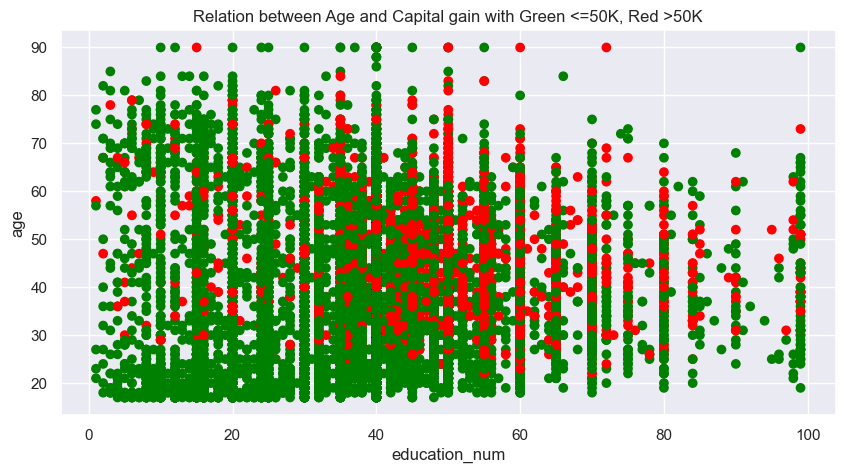

In [71]:
plt.close()
df['class'] = (df["income"].str.contains(">50K"))*1
colors = df['class']
col = ['green','red']
x = df['hours_per_week']
y = df['age']
fig = plt.figure(figsize=(10,5))
plt.scatter(x,y, c=df['class'], cmap=matplotlib.colors.ListedColormap(col))
plt.title("Relation between Age and Capital gain with Green <=50K, Red >50K")
plt.ylabel('age')
plt.xlabel('education_num')
plt.show()

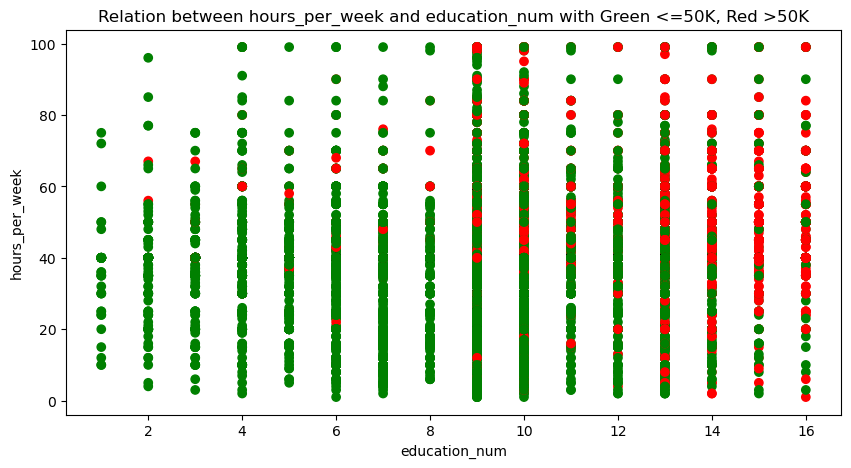

In [9]:
plt.close()
df['class'] = (df["income"].str.contains(">50K"))*1
colors = df['class']
col = ['green','red']
x = df['education_num']
y = df['hours_per_week']
fig = plt.figure(figsize=(10,5))
plt.scatter(x,y, c=df['class'], cmap=matplotlib.colors.ListedColormap(col))
plt.title("Relation between hours_per_week and education_num with Green <=50K, Red >50K")
plt.ylabel('hours_per_week')
plt.xlabel('education_num')
plt.show()

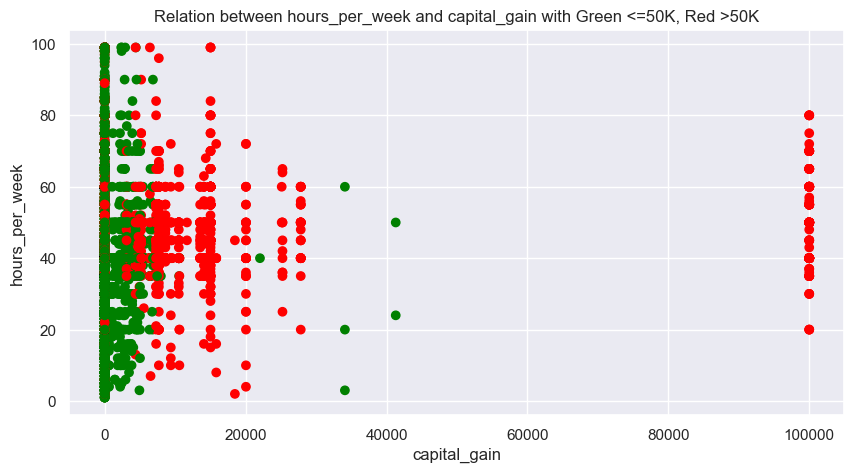

In [19]:
plt.close()
df['class'] = (df["income"].str.contains(">50K"))*1
colors = df['class']
col = ['green','red']
x = df['capital_gain']
y = df['hours_per_week']
fig = plt.figure(figsize=(10,5))
plt.scatter(x,y, c=df['class'], cmap=matplotlib.colors.ListedColormap(col))
plt.title("Relation between hours_per_week and capital_gain with Green <=50K, Red >50K")
plt.ylabel('hours_per_week')
plt.xlabel('capital_gain')
plt.show()

In [ ]:
## SECOND STORY - 1 VISUALISATION :-

(<AxesSubplot:title={'center':'Box plot showing age, hours per week vs. Salary range'}, xlabel='age', ylabel='hours_per_week'>,
 <matplotlib.legend.Legend at 0x7feb01e485e0>)

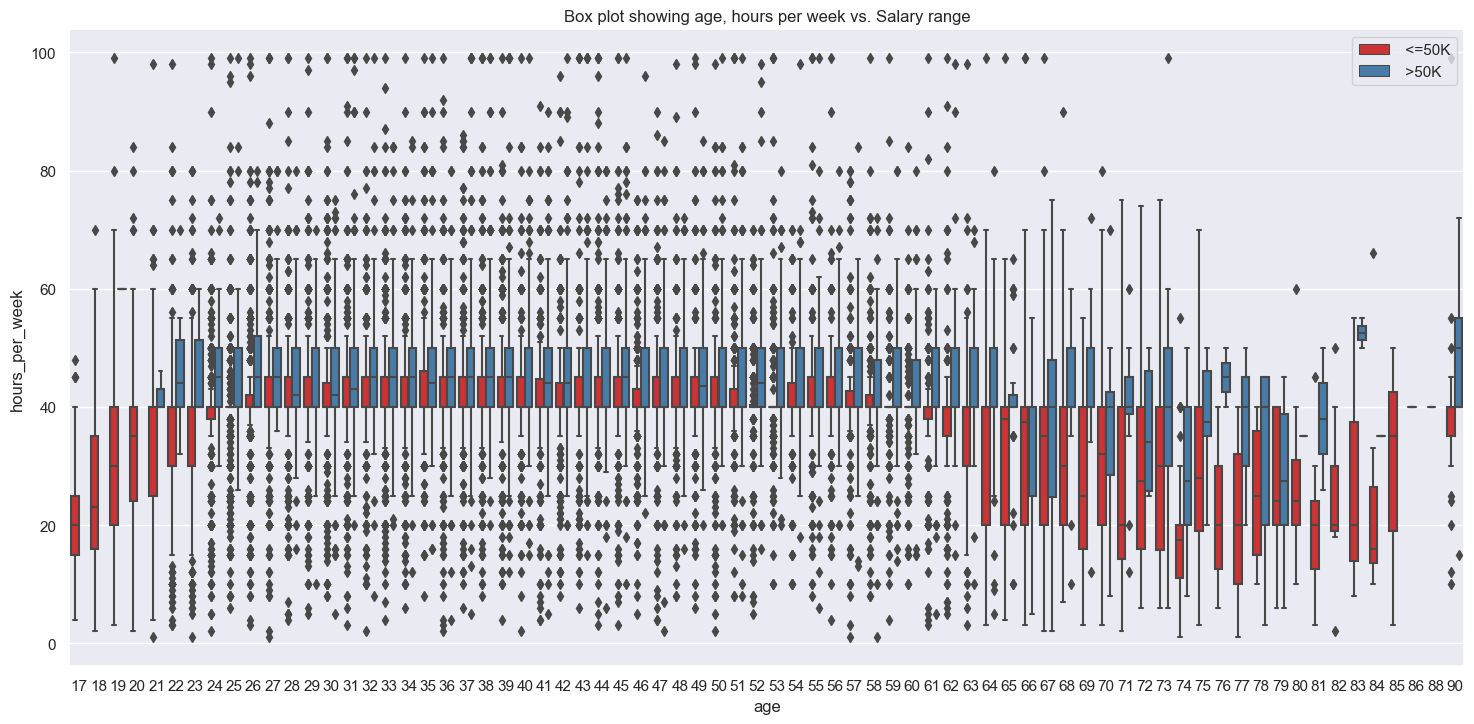

In [32]:
sns.set(rc={'figure.figsize':(18,8.27)})
g = sns.boxplot(
    x='age', 
    y='hours_per_week', 
    data=df,
    palette='Set1',
    hue='income',
    );
g, plt.title("Box plot showing age, hours per week vs. Salary range")
g, plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

(<AxesSubplot:title={'center':'Box plot showing age, hours per week vs. Salary range'}, xlabel='education_num', ylabel='hours_per_week'>,
 <matplotlib.legend.Legend at 0x7f7def3e6ee0>)

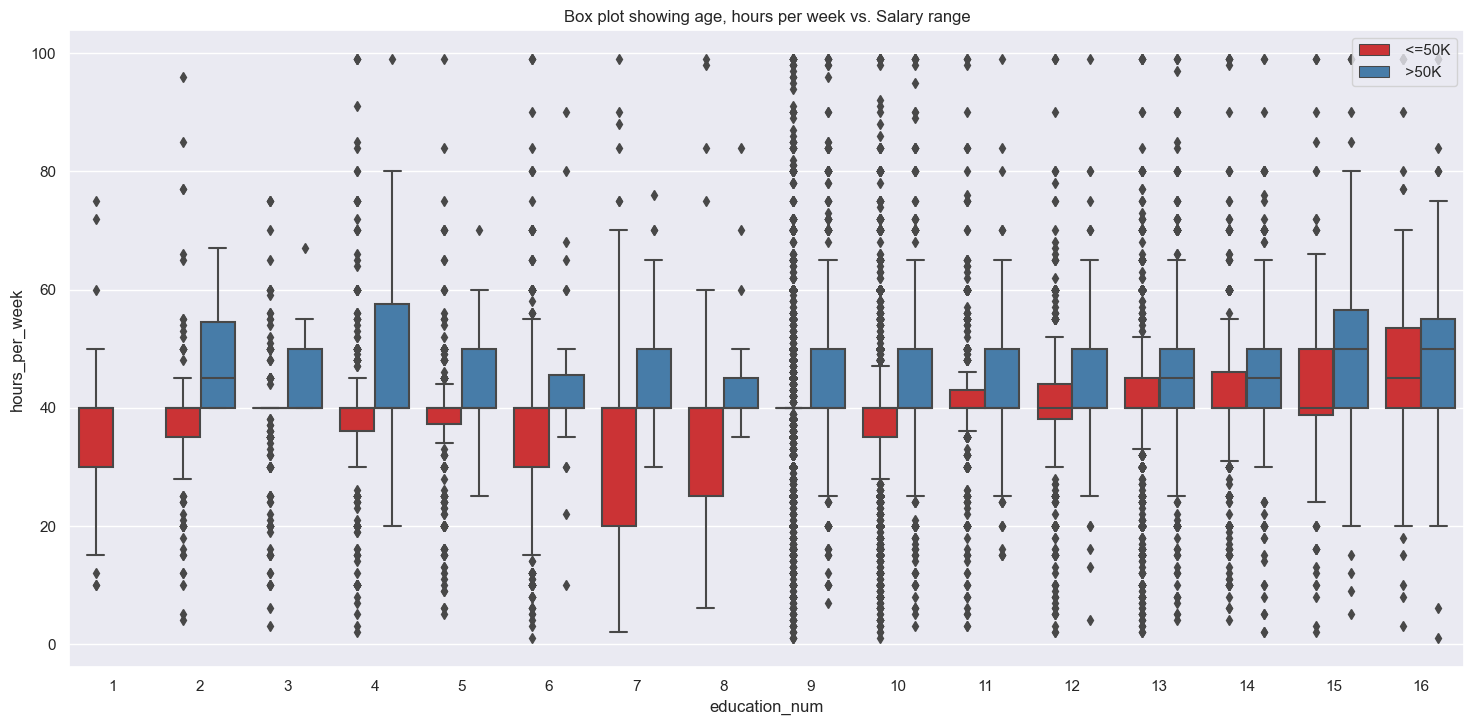

In [14]:
sns.set(rc={'figure.figsize':(18,8.27)})
g = sns.boxplot(
    x='education_num', 
    y='hours_per_week', 
    data=df,
    palette='Set1',
    hue='income',
    );
g, plt.title("Box plot showing age, hours per week vs. Salary range")
g, plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

In [ ]:
## THIRD STORY - 2 VISUALISATIONS :-

sex



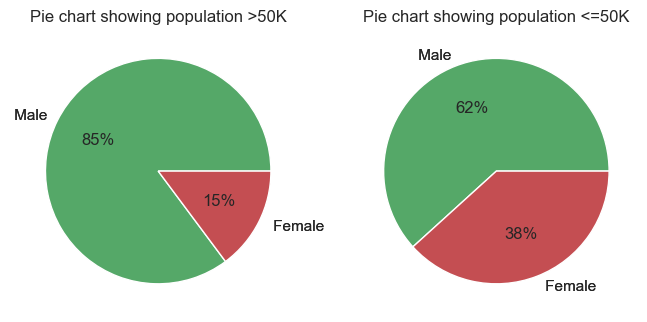

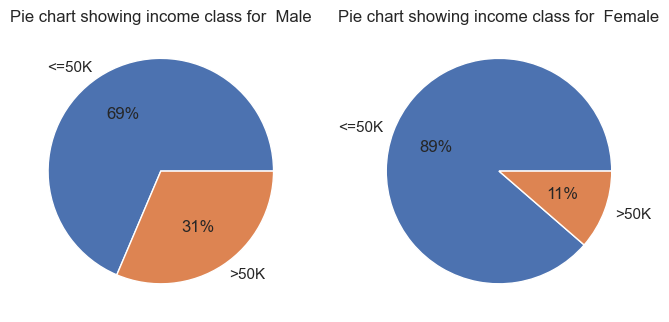

In [37]:
below_50K = df.loc[df["income"].str.contains("<=50K")]
above_50K = df.loc[df["income"].str.contains(">50K")]

def categorical_analysis(column):
    above = Counter(above_50K[column])
    below = Counter(below_50K[column])
    print(column)
    print()
    plt.close()
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8,16))
    axes[0].pie(above.values(), labels=above.keys(), autopct='%1.0f%%')
    axes[0].pie(above.values(), labels=above.keys())
    axes[0].set_title("Pie chart showing population >50K")
    axes[1].pie(below.values(), labels=below.keys(), autopct='%1.0f%%')
    axes[1].pie(below.values(), labels=below.keys())
    axes[1].set_title("Pie chart showing population <=50K")
    plt.show()
    
    
def analyse_categories(column):
    values = df[column].unique()
    plt.close()
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8,16))
    for i, val in enumerate(values):
        val_df = df[df[column].str.contains(val)]
        above = val_df[val_df["income"].str.contains(">50K")]
        below = val_df[val_df["income"].str.contains("<=50K")]
        axes[i].pie([len(below.index), len(above.index)], labels=["<=50K", ">50K"], autopct='%1.0f%%')
        axes[i].set_title("Pie chart showing income class for "+val)
    
    plt.show()
    
categorical_analysis('sex')
analyse_categories('sex')

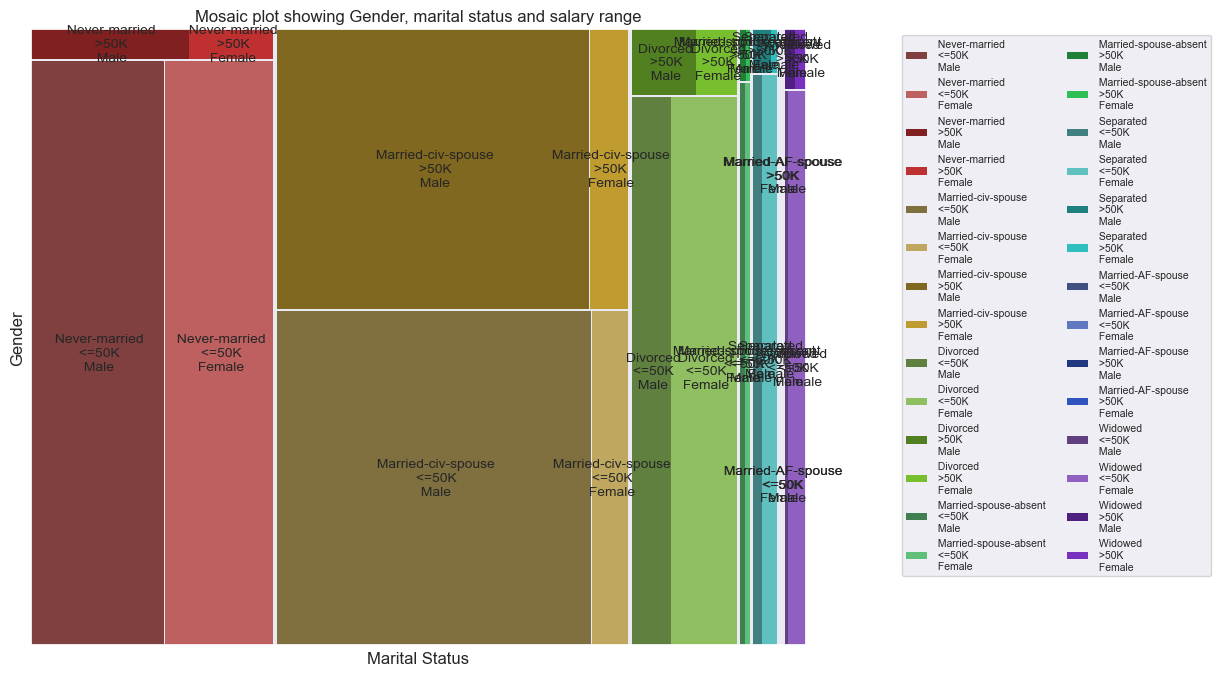

In [7]:
plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(10,8))
fig.subplots_adjust(hspace=1)
mosaic(df, ['marital_status','income', 'sex'], ax=axes, axes_label=False)
plt.xlabel("Marital Status")
plt.ylabel("Gender")
plt.legend(loc='upper right', bbox_to_anchor=(1.53, 1), ncol=2, fontsize=7.5)
plt.title("Mosaic plot showing Gender, marital status and salary range")
plt.show()

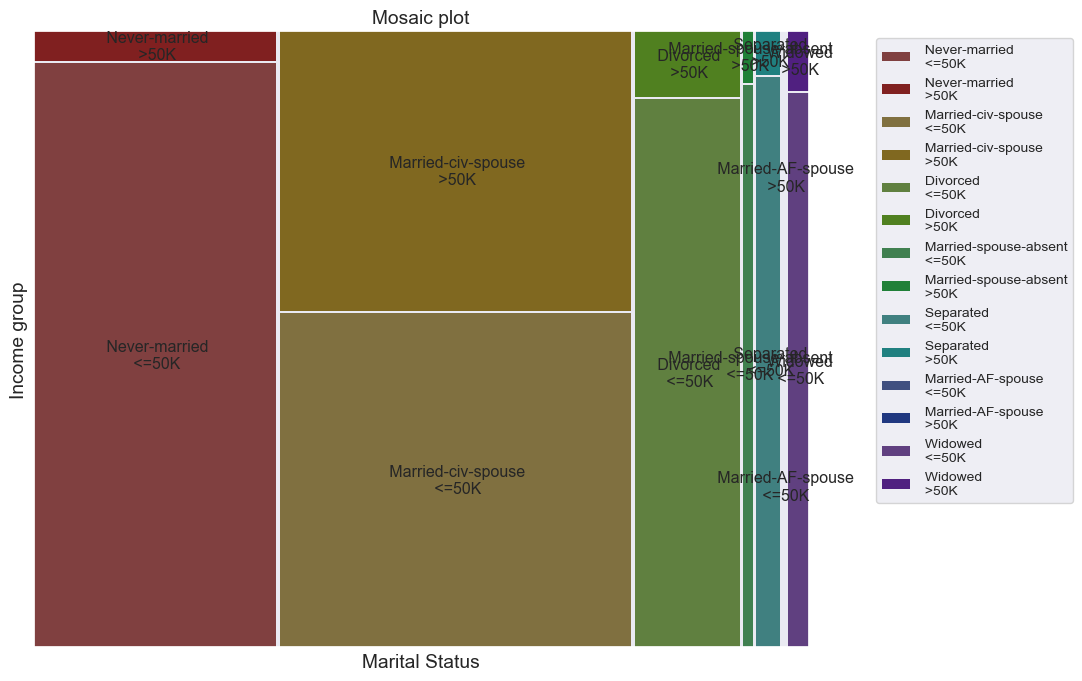

In [67]:
plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(10,8))
fig.subplots_adjust(hspace=1)
mosaic(df, ['marital_status','income'], ax=axes, axes_label=False)
plt.xlabel("Marital Status")
plt.ylabel("Income group")
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1), fontsize=10)
plt.title("Mosaic plot")
plt.show()

In [ ]:
## FOURTH STORY - 1 VISUALISATION :-

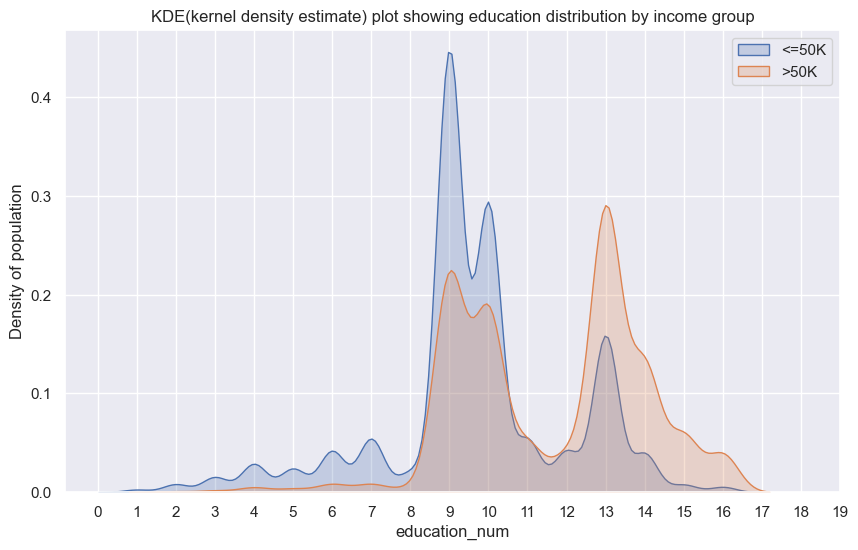

In [15]:
fig = plt.figure(figsize=(10,6))
ax1 = sns.kdeplot(df.loc[df['income']== " <=50K", "education_num"], label = '<=50K', shade=True)
sns.kdeplot(df.loc[df['income']== " >50K", "education_num"], label = '>50K', shade=True, ax=ax1)
plt.xticks(np.arange(0,20,1))
ax1.set_title("KDE(kernel density estimate) plot showing education distribution by income group", loc='center', fontsize=12)
ax1.set_xlabel("education_num")
ax1.set_ylabel("Density of population")
ax1.legend(loc="upper right") 
plt.show()

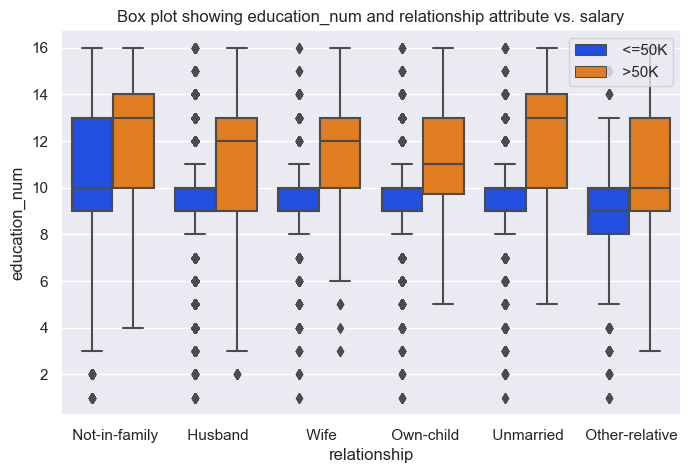

In [73]:
sns.set(rc={'figure.figsize':(8,5)})
g = sns.boxplot(
    x='relationship', 
    y='education_num', 
    data=df,
    palette='bright',
    hue='income',
    );
g, plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.title("Box plot showing education_num and relationship attribute vs. salary")
plt.show()

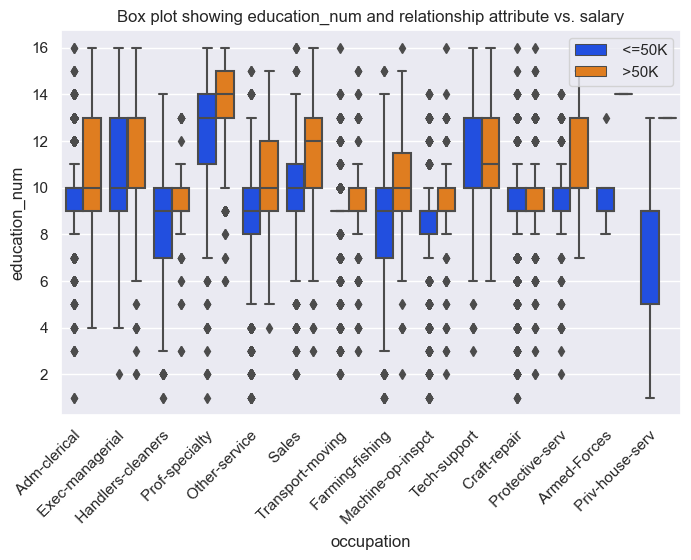

In [74]:
sns.set(rc={'figure.figsize':(8,5)})
g = sns.boxplot(
    x='occupation', 
    y='education_num', 
    data=df,
    palette='bright',
    hue='income',
    );
g, plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.title("Box plot showing education_num and relationship attribute vs. salary")
g,plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
## DO NOT INCLUDE

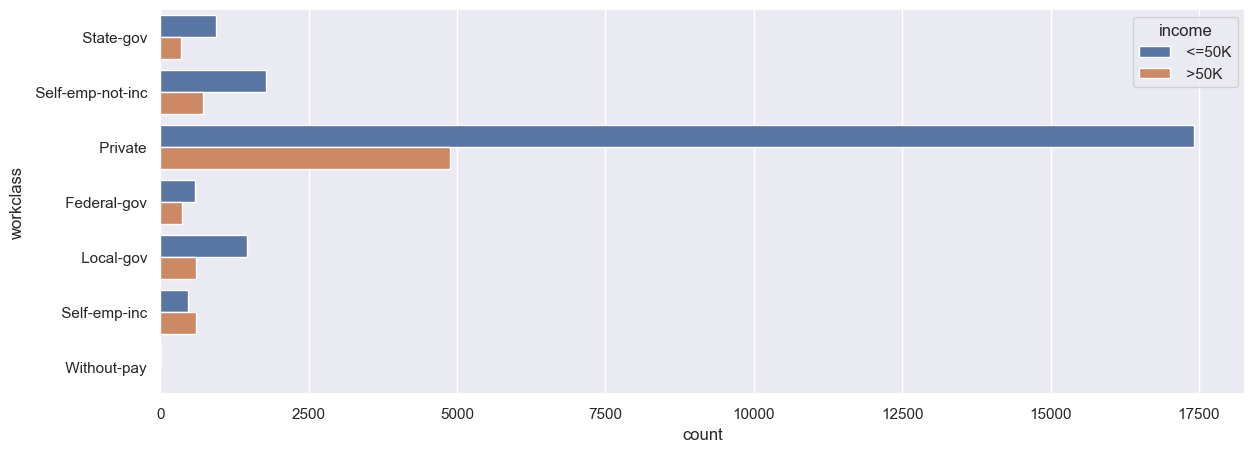

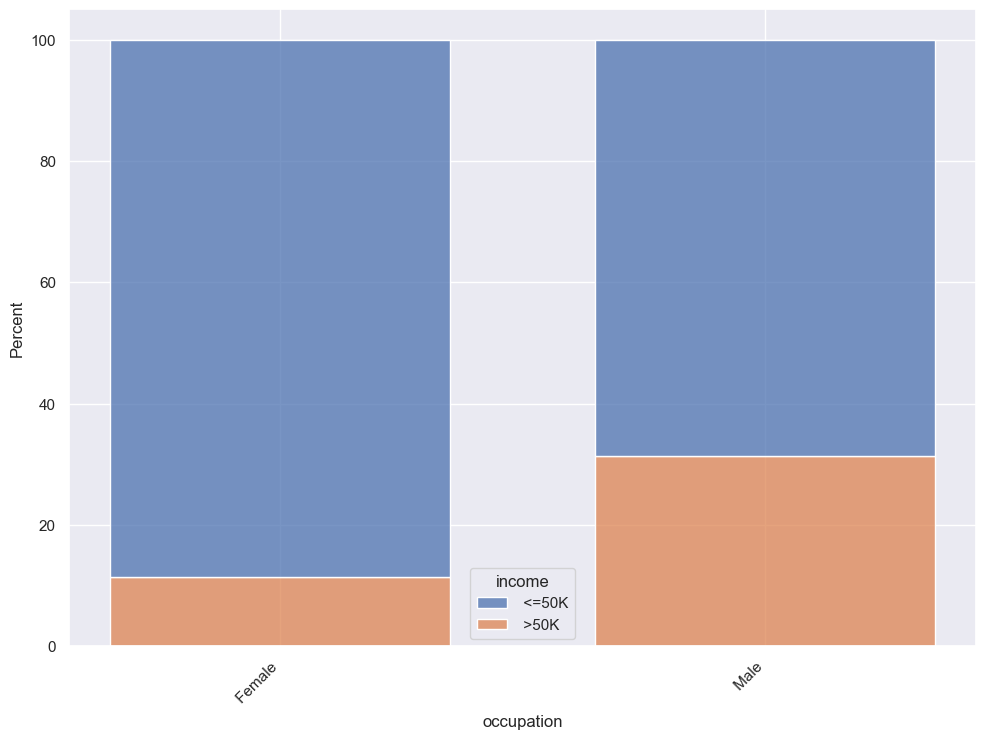

In [39]:
fig = plt.figure(figsize=(14,5))
sns.countplot(data= df, y='workclass', hue='income')
plt.show()

plt.close()
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = df.groupby(['sex'])['income'].value_counts(normalize=True).mul(100).reset_index(name='percent')
g = sns.histplot(data=plot,x='sex', hue = 'income',weights= 'percent',multiple = 'stack',shrink = 0.7)
g.set(ylabel="Percent",xlabel="occupation")
g,plt.xticks(rotation=45, ha='right')
plt.show()

TypeError: __init__() got an unexpected keyword argument 'ncols'

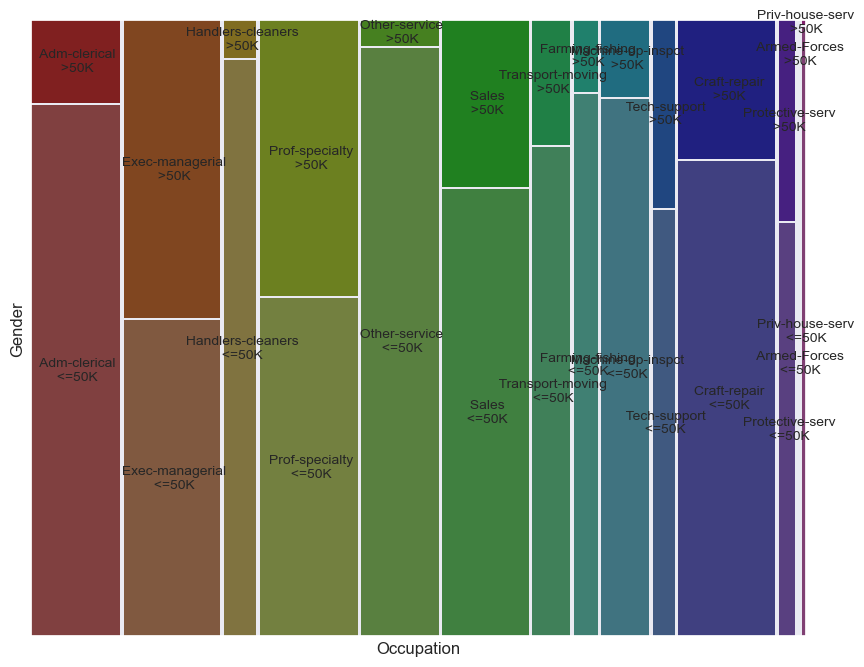

In [18]:
plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(10,8))
fig.subplots_adjust(hspace=1)
mosaic(df, ['occupation', 'income'], ax=axes, axes_label=False)
plt.xlabel("Occupation")
plt.ylabel("Gender")
plt.legend(loc='upper right', bbox_to_anchor=(1.53, 1), ncols=2, fontsize=7.4)
plt.title("Mosaic plot showing Gender, occupation and salary range")
plt.show()

In [ ]:
## FIFTH STORY

In [ ]:
## SIXTH STORY

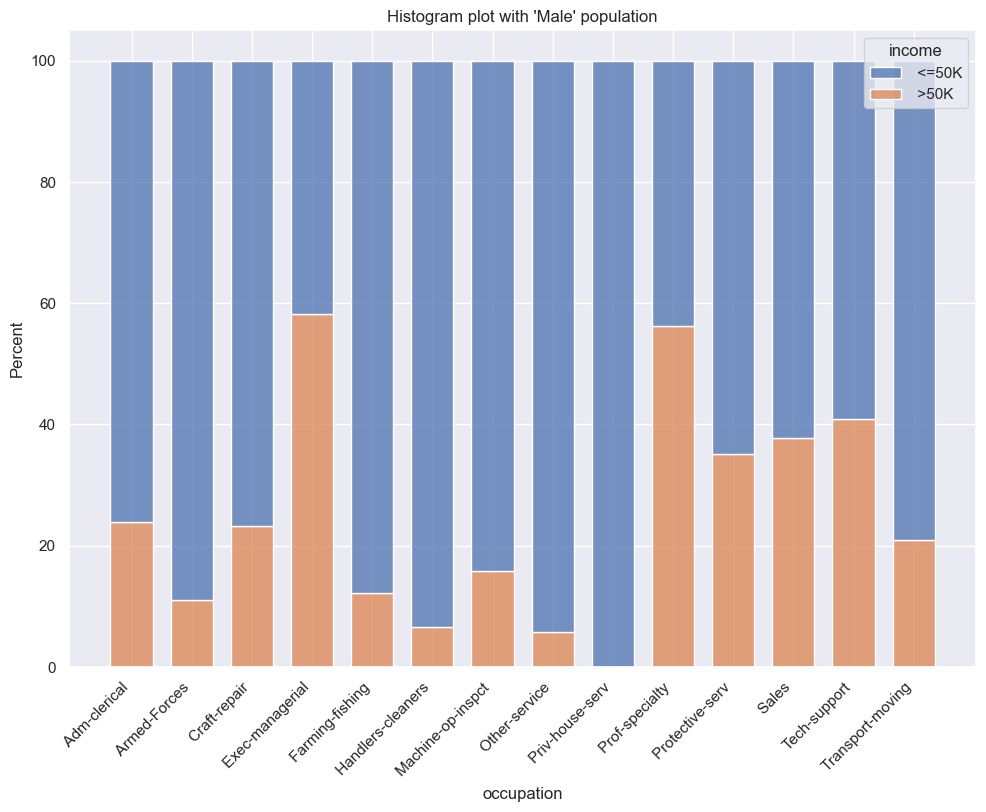

In [68]:
plt.close()
sns.set(rc={'figure.figsize':(11.7,8.27)})
df1 = df[df['sex'].str.contains("Male")]
plot = df1.groupby(['occupation'])['income'].value_counts(normalize=True).mul(100).reset_index(name='percent')
g = sns.histplot(data=plot,x='occupation', hue = 'income',weights= 'percent',multiple = 'stack',shrink = 0.7)
g.set(ylabel="Percent",xlabel="occupation")
g,plt.xticks(rotation=45, ha='right')
plt.title("Histogram plot with 'Male' population")
plt.show()

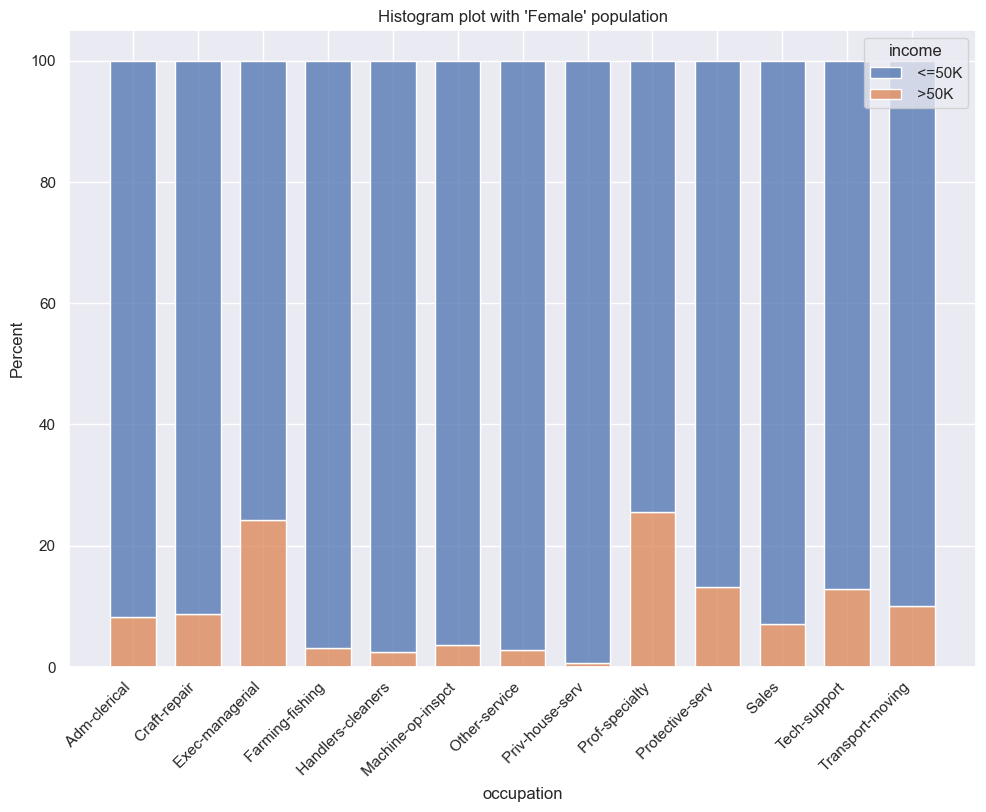

In [70]:
plt.close()
sns.set(rc={'figure.figsize':(11.7,8.27)})
df1 = df[df['sex'].str.contains("Female")]
plot = df1.groupby(['occupation'])['income'].value_counts(normalize=True).mul(100).reset_index(name='percent')
g = sns.histplot(data=plot,x='occupation', hue = 'income',weights= 'percent',multiple = 'stack',shrink = 0.7)
g.set(ylabel="Percent",xlabel="occupation")
g,plt.xticks(rotation=45, ha='right')
plt.title("Histogram plot with 'Female' population")
plt.show()

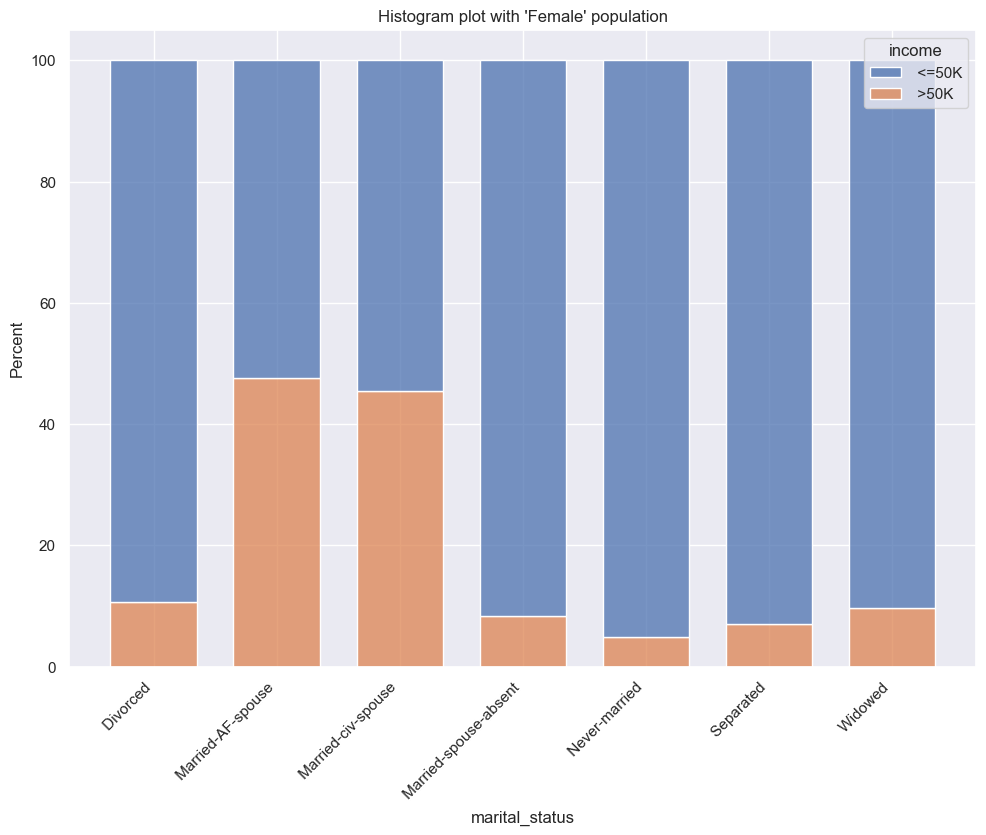

In [69]:
plt.close()
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = df.groupby(['marital_status'])['income'].value_counts(normalize=True).mul(100).reset_index(name='percent')
g = sns.histplot(data=plot,x='marital_status', hue = 'income',weights= 'percent',multiple = 'stack',shrink = 0.7)
g.set(ylabel="Percent",xlabel="marital_status")
g,plt.xticks(rotation=45, ha='right')
plt.title("Histogram plot with 'Female' population")
plt.show()

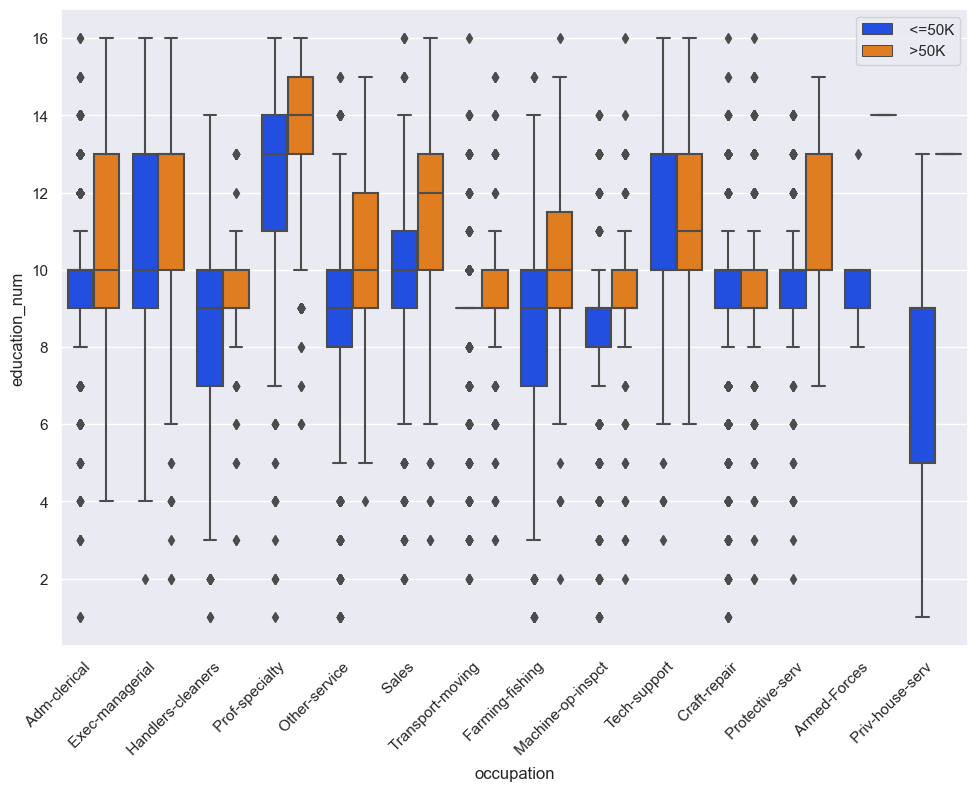

In [51]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.boxplot(
    x='occupation', 
    y='education_num', 
    data=df,
    palette='bright',
    hue='income',
    );
g, plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
g,plt.xticks(rotation=45, ha='right')
plt.show()

In [4]:
df1 = df.copy()
ax = df1.set_index('occupation').T.plot.bar(stacked=True, rot=0, cmap='tab20', figsize=(10, 7))
ax.legend(bbox_to_anchor=(1.01, 1.02), loc='upper left')
plt.tight_layout()
plt.show()

TypeError: no numeric data to plot